**Assignment 1:** Image Processing using OpenCV.
Objective: Understand the basics of image handling in OpenCV, including loading, displaying, and performing basic transformations such as color space conversion, resizing, cropping, rotation, and flipping.
Tasks:
1.	Load and Display an Image:
o	Use OpenCV to read and display an image.
o	Check the image’s dimensions and number of color channels.
o	Understand how image data is stored and represented.
2.	Convert Image Colour Spaces:
o	Convert the image from RGB to Grayscale.
o	Convert the image from RGB to HSV.
o	Understand the importance of Grayscale and HSV color models in computer vision applications.
3.	Resize the Image:
o	Use cv2.resize() to change the size of the image (both enlarging and reducing).
4.	Crop the Image:
o	Use array slicing to extract a region of interest (ROI) from the image.
5.	Rotate the Image:
o	Use cv2.rotate() to rotate the image by 90, 180, and 270 degrees.
6.	Flip the Image:
o	Use cv2.flip() to flip the image horizontally, vertically, and both.


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
IMG_PATH = '/content/drive/MyDrive/SBUP/GAI&CV/mona.png'
from google.colab.patches import cv2_imshow


In [ ]:
def load_and_display_image(path):
    image = cv2.imread(path)
    if image is None:
        print("Error: Could not load image.")
        return None
    print(f"✅ Image loaded: {path}")
    print(f"Shape: {image.shape} [Height, Width, Channels]")
    print(f"Data type: {type(image)}")
    cv2_imshow(image)
    return image

✅ Image loaded: /content/drive/MyDrive/SBUP/GAI&CV/mona.png
Shape: (346, 231, 3) [Height, Width, Channels]
Data type: <class 'numpy.ndarray'>


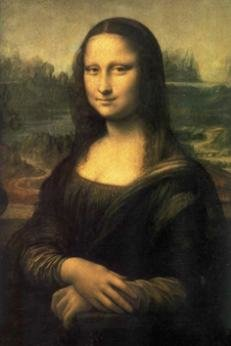

In [ ]:
image = load_and_display_image(IMG_PATH)


Image shape: (346, 231, 3) (Height, Width, Channels)


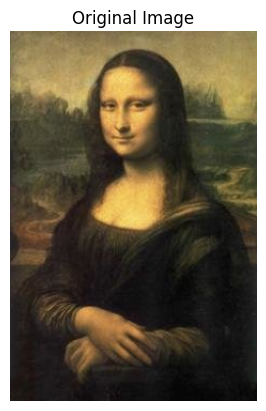

In [ ]:
image = cv2.imread(IMG_PATH)

# Check dimensions and number of color channels
print(f"Image shape: {image.shape} (Height, Width, Channels)")

# Display using matplotlib (convert BGR to RGB)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

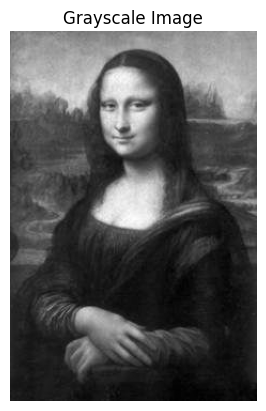

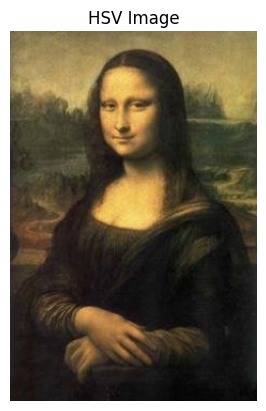

In [ ]:
# Convert to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Display Grayscale
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

# Display HSV (convert HSV → RGB for visualization)
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB))
plt.title("HSV Image")
plt.axis('off')
plt.show()


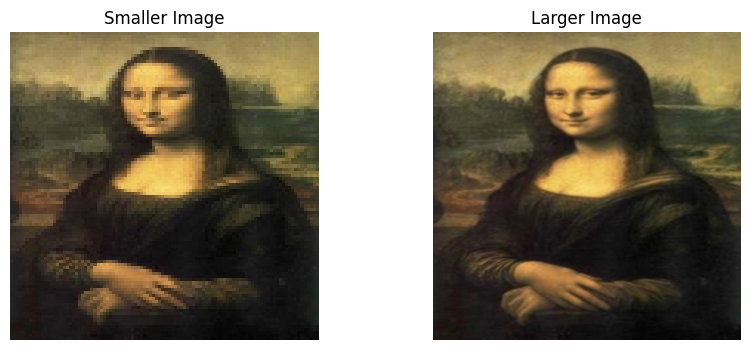

In [ ]:
# Resize (smaller)
small_image = cv2.resize(image, (100, 100))

# Resize (larger)
large_image = cv2.resize(image, (600, 600))

# Display both
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(small_image, cv2.COLOR_BGR2RGB))
plt.title("Smaller Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(large_image, cv2.COLOR_BGR2RGB))
plt.title("Larger Image")
plt.axis('off')
plt.show()


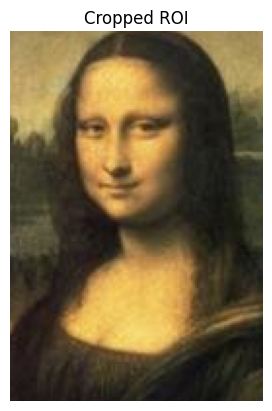

In [ ]:
# Crop (ROI)
roi = image[20:210, 50:180]  # [rows, columns]

# Display
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title("Cropped ROI")
plt.axis('off')
plt.show()


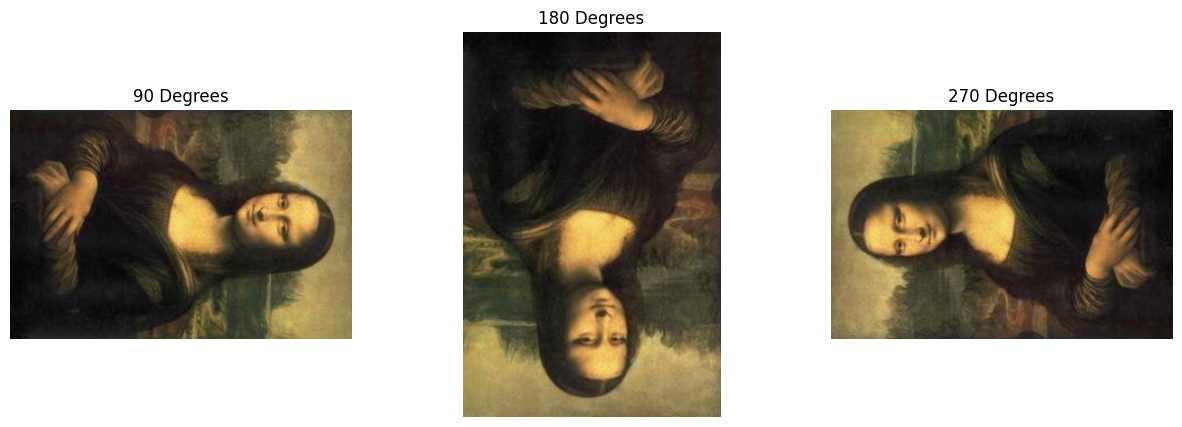

In [ ]:
 # Rotate 90, 180, 270 degrees

image = cv2.imread(IMG_PATH)
rot_90 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
rot_180 = cv2.rotate(image, cv2.ROTATE_180)
rot_270 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)

# Display
titles = ["90 Degrees", "180 Degrees", "270 Degrees"]
images = [rot_90, rot_180, rot_270]

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.show()


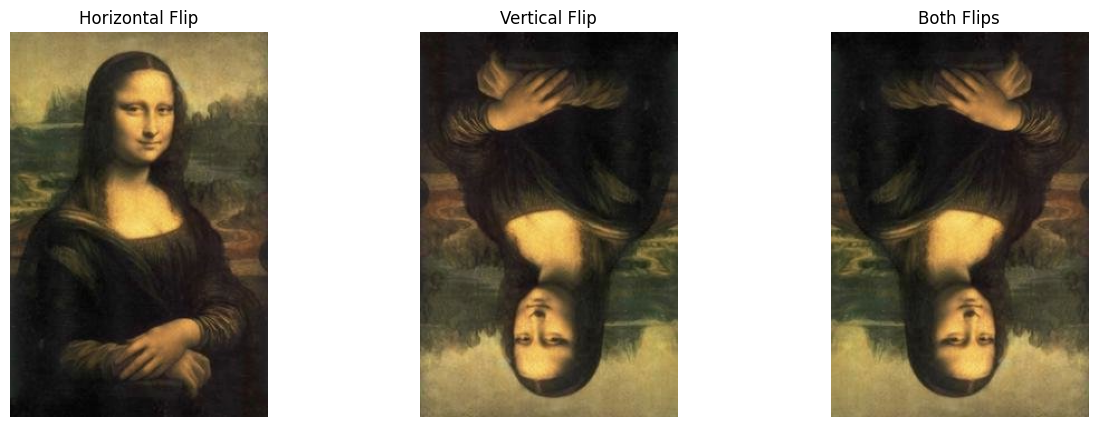

In [ ]:
# Flip horizontally (1), vertically (0), both (-1)
flip_horizontal = cv2.flip(image, 1)
flip_vertical = cv2.flip(image, 0)
flip_both = cv2.flip(image, -1)

# Display
titles = ["Horizontal Flip", "Vertical Flip", "Both Flips"]
images = [flip_horizontal, flip_vertical, flip_both]

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.show()


**Assignment 2:** Image Thresholding, Blurring, and Sharpening using OpenCV.
Objective: Learn and apply image preprocessing techniques such as thresholding, blurring, and sharpening to enhance or segment specific regions of an image.
Tasks:
1.	Thresholding Techniques:
o	Apply Simple Thresholding using cv2.threshold() to segment an image based on fixed pixel intensity values.
o	Apply Adaptive Thresholding using cv2.adaptiveThreshold() for images with varying lighting conditions.
2.	Blurring Techniques:
o	Use Gaussian Blur with cv2.GaussianBlur() to reduce image noise and detail.
o	Apply Median Blur using cv2.medianBlur() for removing salt-and-pepper noise while preserving edges.
3.	Image Sharpening:
o	Use cv2.filter2D() with a custom kernel to sharpen the image by enhancing edges and details.


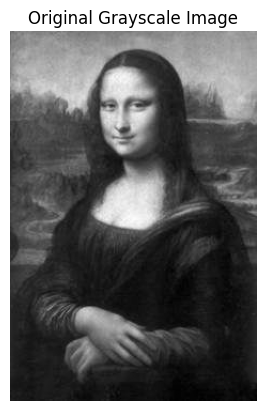

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the image
IMG_PATH = '/content/drive/MyDrive/SBUP/GAI&CV/mona.png'

# Load image in grayscale for thresholding
gray_img = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)

# Display original grayscale image
plt.imshow(gray_img, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()


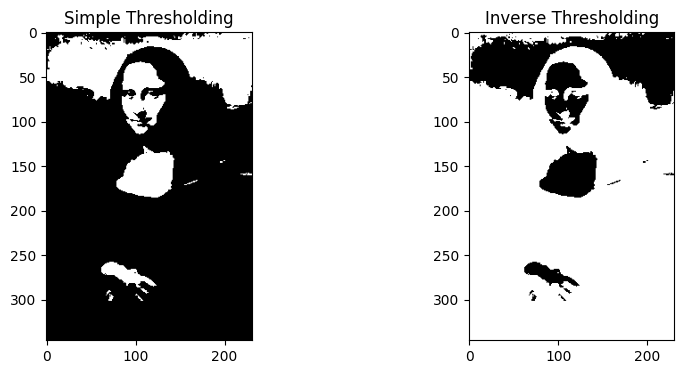

In [ ]:
# Apply Simple Thresholding
_, thresh_binary = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
_, thresh_inv = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV)

# Display
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(thresh_binary, cmap='gray')
plt.title("Simple Thresholding")

plt.subplot(1, 2, 2)
plt.imshow(thresh_inv, cmap='gray')
plt.title("Inverse Thresholding")
plt.show()


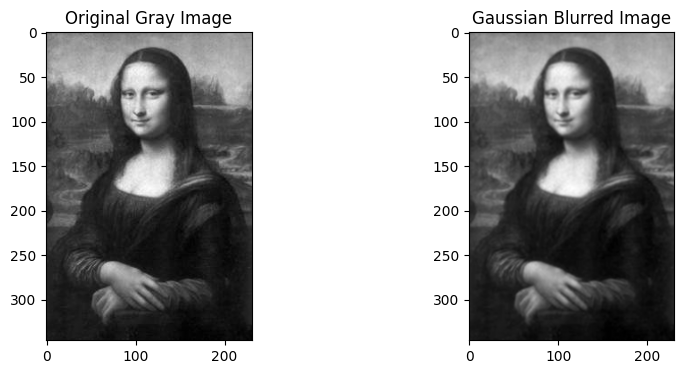

In [ ]:
# Apply Gaussian Blur
gaussian_blur = cv2.GaussianBlur(gray_img, (3, 3), 0)

# Display
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Gray Image")

plt.subplot(1, 2, 2)
plt.imshow(gaussian_blur, cmap='gray')
plt.title("Gaussian Blurred Image")
plt.show()

# # Display
# plt.imshow(gaussian_blur, cmap='gray')
# plt.title("Gaussian Blurred Image")
# plt.axis('off')
# plt.show()


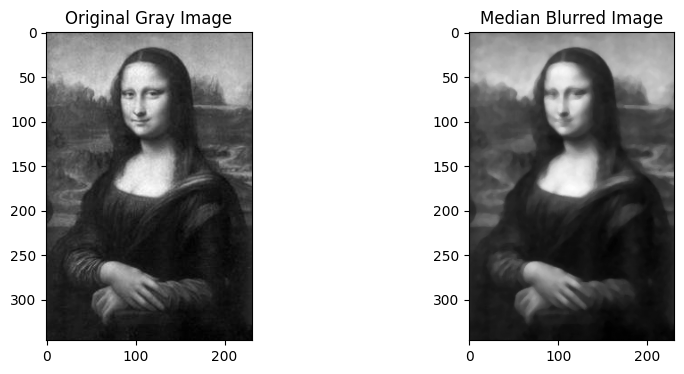

In [ ]:
# Apply Median Blur
median_blur = cv2.medianBlur(gray_img, 5)

# Display
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Gray Image")

plt.subplot(1, 2, 2)
plt.imshow(median_blur, cmap='gray')
plt.title("Median Blurred Image")
plt.show()

# # Display
# plt.imshow(median_blur, cmap='gray')
# plt.title("Median Blurred Image")
# plt.axis('off')
# plt.show()


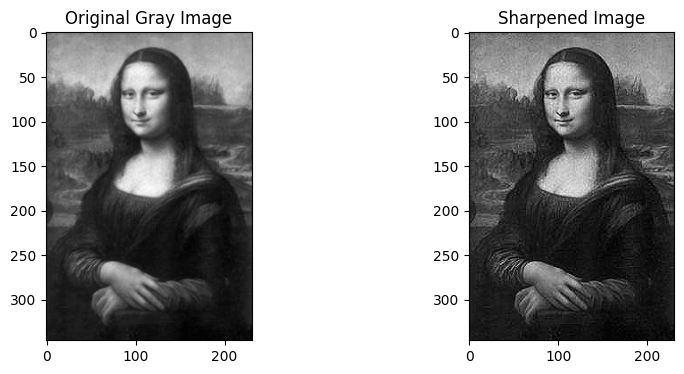

In [ ]:
# Define sharpening kernel
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Apply sharpening
sharpened_image = cv2.filter2D(gray_img, -1, sharpen_kernel)

# Display
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Gray Image")

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened Image")
plt.show()

# # Display
# plt.imshow(sharpened_image, cmap='gray')
# plt.title("Sharpened Image")
# plt.axis('off')
# plt.show()


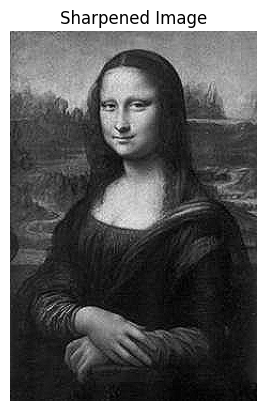

In [ ]:
# Define sharpening kernel
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Apply sharpening
sharpened_image = cv2.filter2D(gray_img, -1, sharpen_kernel)

# Display
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened Image")
plt.axis('off')
plt.show()


**Assignment 3**: Batch Image Preprocessing on Google Colab
Objective: Learn to automate the preprocessing of multiple images using Python and OpenCV in a Google Colab environment. Get familiar with mounting Google Drive, uploading datasets, and executing preprocessing tasks in the cloud.
Tasks:
1.	Google Colab Setup:
o	Mount Google Drive in Colab.
o	Upload and access image datasets from Drive.
o	Understand the structure of notebooks in a cloud-based environment.
2.	Batch Image Preprocessing:
o	Use the os module to iterate through a folder containing multiple images.
o	For each image, apply the following preprocessing steps using OpenCV:
	Resize to a fixed size (e.g., 256×256).
	Convert to Grayscale.
	Normalize pixel values to the range [0, 1].
3.	Save and Verify Outputs:
o	Save the processed images to a new folder in your Drive.


In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

Path = "/content/drive/MyDrive/SBUP/GAI&CV/Dataset/OriginalImages"


In [ ]:
input_folder = '/content/drive/MyDrive/SBUP/GAI&CV/Dataset/OriginalImages'
output_folder = '/content/drive/MyDrive/SBUP/GAI&CV/Dataset/PreprocessedImages'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [ ]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)

    img_resized = cv2.resize(img, (256, 256))

    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

    img_normalized = img_gray / 255.0

    return img_normalized

In [ ]:
for img_name in os.listdir(input_folder):
    img_path = os.path.join(input_folder, img_name)

    if not (img_name.endswith('.jpg') or img_name.endswith('.png') or img_name.endswith('.jpeg')):
        continue

    processed_img = preprocess_image(img_path)

    output_path = os.path.join(output_folder, img_name)
    cv2.imwrite(output_path, (processed_img * 255).astype('uint8'))

print("✅ All images preprocessed and saved successfully!")

✅ All images preprocessed and saved successfully!


In [ ]:
os.listdir(input_folder)

['IDRiD_03.jpg',
 'IDRiD_05.jpg',
 'IDRiD_02.jpg',
 'IDRiD_01.jpg',
 'IDRiD_04.jpg',
 'IDRiD_10.jpg',
 'IDRiD_07.jpg',
 'IDRiD_08.jpg',
 'IDRiD_09.jpg',
 'IDRiD_06.jpg',
 'IDRiD_11.jpg',
 'IDRiD_16.jpg',
 'IDRiD_15.jpg',
 'IDRiD_12.jpg',
 'IDRiD_14.jpg',
 'IDRiD_13.jpg',
 'IDRiD_20.jpg',
 'IDRiD_22.jpg',
 'IDRiD_18.jpg',
 'IDRiD_21.jpg',
 'IDRiD_17.jpg',
 'IDRiD_19.jpg',
 'IDRiD_24.jpg',
 'IDRiD_27.jpg',
 'IDRiD_25.jpg',
 'IDRiD_26.jpg',
 'IDRiD_23.jpg',
 'IDRiD_28.jpg',
 'IDRiD_29.jpg',
 'IDRiD_31.jpg',
 'IDRiD_32.jpg',
 'IDRiD_30.jpg',
 'IDRiD_34.jpg',
 'IDRiD_33.jpg',
 'IDRiD_37.jpg',
 'IDRiD_36.jpg',
 'IDRiD_35.jpg',
 'IDRiD_40.jpg',
 'IDRiD_39.jpg',
 'IDRiD_41.jpg',
 'IDRiD_38.jpg',
 'IDRiD_42.jpg',
 'IDRiD_43.jpg',
 'IDRiD_81.jpg',
 'IDRiD_46.jpg',
 'IDRiD_45.jpg',
 'IDRiD_44.jpg',
 'IDRiD_80.jpg',
 'IDRiD_79.jpg',
 'IDRiD_49.jpg',
 'IDRiD_76.jpg',
 'IDRiD_51.jpg',
 'IDRiD_52.jpg',
 'IDRiD_54.jpg',
 'IDRiD_58.jpg',
 'IDRiD_56.jpg',
 'IDRiD_57.jpg',
 'IDRiD_59.jpg',
 'IDRiD_55.jpg